In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (18,9)

In [2]:
columns = ['Time', 'Distance', 'Y', 'Label']
data = pd.read_csv('../contagens/itapoa-01.csv', names=columns)

data['Y'] = data['Y'].fillna(0)
data['Label'] = data['Label'].fillna('')
data['Time'] = data['Time'] - data['Time'].min()
data['Distance'] = data['Distance'] < 8000

acm = 0
def momentum(distance, beta):
    global acm
    acm = acm * beta + (1 - beta) * distance 
    return acm

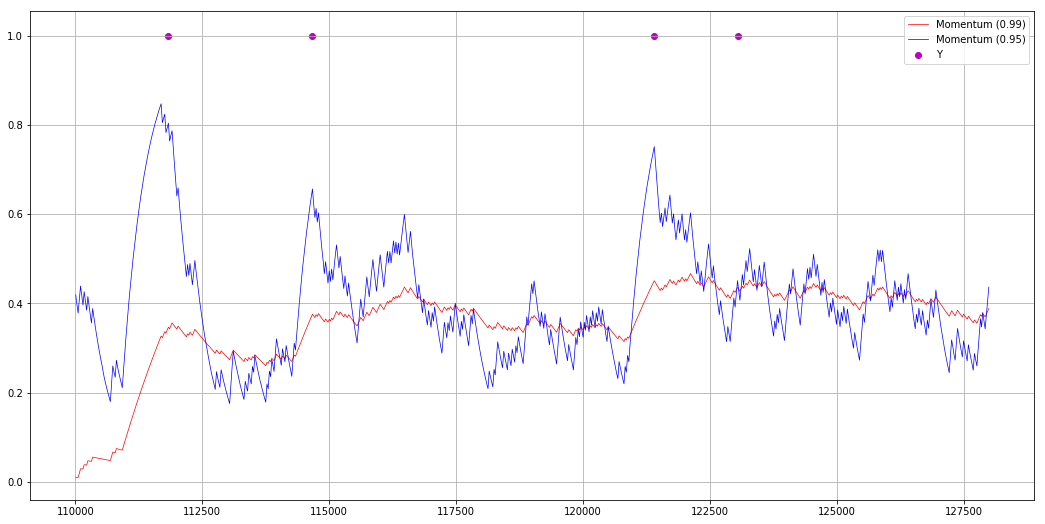

In [3]:
time_window = 0.3 * 60 * 1000
time_start = 110000
time_end = time_start + time_window

sample = data[(data.Time > time_start) & (data.Time <= time_end)].copy()
Y = sample[sample.Y == 1].copy()

plt.scatter(Y['Time'], Y['Y'], marker='o', color='m')
plt.plot(sample['Time'], sample['Distance'].apply(momentum, args=(0.99,)), 'r', linewidth=0.7, label='Momentum (0.99)')
plt.plot(sample['Time'], sample['Distance'].apply(momentum, args=(0.95,)), 'b', linewidth=0.7, label='Momentum (0.95)')

plt.grid(True)
plt.legend();